# PCA - Exemplo 1: *HAR* com PCA

Vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [1]:
# Importando bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Carregando e definindo o dataset
filename_features = r"C:\Users\chris\OneDrive\Documentos\EBAC\Cientista de dados\Módulo 27\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\features.txt"
filename_labels = r"C:\Users\chris\OneDrive\Documentos\EBAC\Cientista de dados\Módulo 27\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\activity_labels.txt"

filename_subtrain = r"C:\Users\chris\OneDrive\Documentos\EBAC\Cientista de dados\Módulo 27\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\subject_train.txt"
filename_xtrain = r"C:\Users\chris\OneDrive\Documentos\EBAC\Cientista de dados\Módulo 27\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt"
filename_ytrain = r"C:\Users\chris\OneDrive\Documentos\EBAC\Cientista de dados\Módulo 27\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt"

filename_subtest = r"C:\Users\chris\OneDrive\Documentos\EBAC\Cientista de dados\Módulo 27\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\test\subject_test.txt"
ffilename_xtest = r"C:\Users\chris\OneDrive\Documentos\EBAC\Cientista de dados\Módulo 27\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt"
filename_ytest = r"C:\Users\chris\OneDrive\Documentos\EBAC\Cientista de dados\Módulo 27\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\chris\AppData\Local\Temp\ipykernel_5996\125094000.py:25: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\chris\AppData\Local\Temp\ipykernel_5996\125094000.py:28: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
C:\Users\chris\AppData\Local\Temp\ipykernel_5996\125094000.py:32: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)


## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [2]:
# Separando em treino, teste e validação

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

In [3]:
%%time

# Treinamento do classificador sem restrição de ccp_alpha
clf = DecisionTreeClassifier(random_state=1234).fit(X_train, y_train)

# Cálculo do caminho de pruning com uma valor mínimo de amostras por folha definido (min_samples_leaf=20)
caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

# Filtrar ccp_alphas positivos e únicos
ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])

# Lista para armazenar os classificadores
clfs = []

# Treinamento de diferentes árvores com valores de ccp_alpha variando
for ccp_alpha in ccp_alphas:
    # Treinamento de cada árvore com o valor específico de ccp_alpha (0.001 neste caso)
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.001).fit(X_train, y_train)
    clfs.append(clf)

CPU times: total: 16min 38s
Wall time: 17min 5s


In [7]:
# Encontrar a melhor árvore com base na maior acurácia no conjunto de validação
ind_melhor_arvore = np.argmax(valid_scores)
melhor_arvore = clfs[ind_melhor_arvore]

# Avaliação da acurácia no conjunto de teste utilizando a melhor árvore
acc_train = train_scores[ind_melhor_arvore]
acc_valid = valid_scores[ind_melhor_arvore]
acc_teste = melhor_arvore.score(X_test, y_test)

# Exibição dos resultados
print(f'Acurácia da melhor árvore na base de treino:    {acc_train*100:.1f}')
print(f'Acurácia da melhor árvore na base de validação: {acc_valid*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {acc_teste*100:.1f}')

Acurácia da melhor árvore na base de treino:    97.7
Acurácia da melhor árvore na base de validação: 94.2
Acurácia da melhor árvore na base de teste:     86.0


## Árvore com PCA

Fazendo uma análise de componemtes principais das variáveis originais. Utilizando apenas uma componente. Fazendo uma árvore de decisão com esta componente como variável explicativa.

- Avaliando a acurácia nas bases de treinamento e teste
- Avaliando o tempo de processamento

In [40]:
%%time

# Realizando a Análise de Componentes Principais (PCA) com 60 componentes nos dados de treinamento
prcomp = PCA(n_components=1).fit(X_train)

# Transformando os conjuntos de treinamento, validação e teste usando o modelo PCA
pc_treino = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)

# Exibindo a forma (shape) do conjunto de treinamento transformado
pc_treino.shape


CPU times: total: 797 ms
Wall time: 236 ms


(5514, 1)

In [41]:
# Definindo o número de componentes principais
n = 1

# Criando os nomes das colunas para os novos conjuntos de dados
colunas = ['cp' + str(x + 1) for x in range(n)]

# Criando DataFrames para os conjuntos de treinamento, validação e teste com os componentes principais
pc_train = pd.DataFrame(pc_treino[:, :n], columns=colunas)
pc_test = pd.DataFrame(pc_teste[:, :n], columns=colunas)


In [42]:
%%time

# Treinando um classificador de árvore de decisão no conjunto de treinamento com os componentes principais
clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

# Realizando a poda da árvore de decisão com base na complexidade do custo
caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

# Removendo valores duplicados e negativos de alfas CCP (Complexidade do Custo Poda)
ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])

# Inicializando uma lista para armazenar os classificadores resultantes da poda com diferentes alfas CCP
clfs = []

# Iterando sobre os diferentes alfas CCP e treinando classificadores com cada alfa
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
    clfs.append(clf)


CPU times: total: 10.3 s
Wall time: 10.3 s


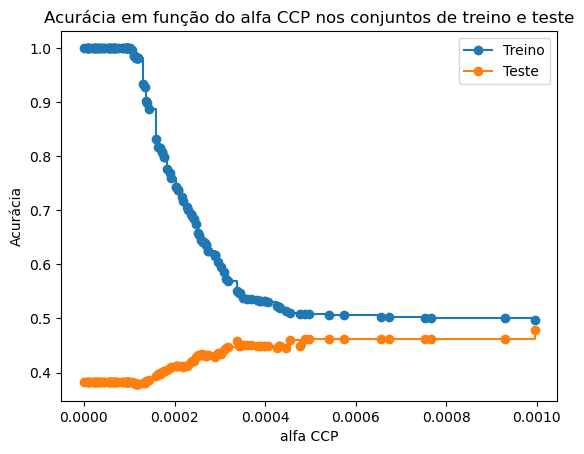

In [45]:
# Calculando as pontuações de treino e teste para diferentes alfas CCP
train_scores = [clf.score(pc_train, y_train) for clf in clfs]
test_scores = [clf.score(pc_test, y_test) for clf in clfs]

# Criando um gráfico para visualizar a relação entre alfas CCP e acurácia
fig, ax = plt.subplots()
ax.set_xlabel("alfa CCP")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia em função do alfa CCP nos conjuntos de treino e teste")

# Definindo o número de alfas CCP a serem exibidos no gráfico (nx últimos alfas)
nx = -10

# Plotando as curvas de acurácia para os conjuntos de treino e validação
ax.plot(ccp_alphas[:nx], train_scores[:nx], marker='o', label="Treino", drawstyle="steps-post")
ax.plot(ccp_alphas[:nx], test_scores[:nx], marker='o', label="Teste", drawstyle="steps-post")

# Adicionando uma legenda ao gráfico
ax.legend()

# Exibindo o gráfico
plt.show()


In [46]:
# Encontrando o índice da melhor árvore com base na pontuação de validação
ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1

# Obtendo a melhor árvore do conjunto de árvores podadas
melhor_arvore = clfs[ind_melhor_arvore]

# Imprimindo as métricas de desempenho da melhor árvore nos conjuntos de treino, validação e teste
print(f'Acurácia da melhor árvore na base de treino:    {train_scores[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {melhor_arvore.score(pc_test, y_test)*100:.1f}')


Acurácia da melhor árvore na base de treino:    49.6
Acurácia da melhor árvore na base de teste:     47.9


## Testando o número de componentes

Testando a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avaliando para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


In [47]:
# Criando uma função que avalia e mostra o resultado com várias possibilidades de quantidades de componentes
def avaliar_arvore_com_componentes(X_train, X_valid, X_test, y_train, y_valid, y_test, componentes):
    resultados = []

    for n_componentes in componentes:
        print(f"\nAvaliando com {n_componentes} componentes principais.")

        # Realizando a Análise de Componentes Principais (PCA) com n_componentes nos dados de treinamento
        prcomp = PCA(n_components=n_componentes).fit(X_train)

        # Transformando os conjuntos de treinamento, validação e teste usando o modelo PCA
        pc_treino = prcomp.transform(X_train)
        pc_valida = prcomp.transform(X_valid)
        pc_teste  = prcomp.transform(X_test)

        # Criando DataFrames para os conjuntos de treinamento, validação e teste com os componentes principais
        colunas = [f'cp{x + 1}' for x in range(n_componentes)]
        pc_train = pd.DataFrame(pc_treino[:, :n_componentes], columns=colunas)
        pc_valid = pd.DataFrame(pc_valida[:, :n_componentes], columns=colunas)
        pc_test = pd.DataFrame(pc_teste[:, :n_componentes], columns=colunas)

        # Treinando um classificador de árvore de decisão no conjunto de treinamento com os componentes principais
        clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

        # Realizando a poda da árvore de decisão com base na complexidade do custo
        caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
        ccp_alphas = np.unique(caminho.ccp_alphas[caminho.ccp_alphas >= 0])

        # Inicializando uma lista para armazenar os classificadores resultantes da poda com diferentes alfas CCP
        clfs = []

        # Iterando sobre os diferentes alfas CCP e treinando classificadores com cada alfa
        for ccp_alpha in ccp_alphas:
            clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
            clfs.append(clf)

        # Calculando as pontuações de treino e validação para diferentes alfas CCP
        train_scores = [clf.score(pc_train, y_train) for clf in clfs]
        valid_scores = [clf.score(pc_valid, y_valid) for clf in clfs]

        # Encontrando o índice da melhor árvore com base na pontuação de validação
        ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1

        # Obtendo a melhor árvore do conjunto de árvores podadas
        melhor_arvore = clfs[ind_melhor_arvore]

        # Calculando a acurácia da melhor árvore no conjunto de teste
        teste_accuracy = melhor_arvore.score(pc_test, y_test) * 100

        # Armazenando os resultados
        resultados.append({
            'Componentes': n_componentes,
            'AcuraciaTreino': train_scores[ind_melhor_arvore] * 100,
            'AcuraciaValidacao': valid_scores[ind_melhor_arvore] * 100,
            'AcuraciaTeste': teste_accuracy
        })

        # Imprimindo as métricas de desempenho da melhor árvore nos conjuntos de treino, validação e teste
        print(f'Acurácia da melhor árvore na base de treino:    {train_scores[ind_melhor_arvore]*100:.1f}')
        print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.1f}')
        print(f'Acurácia da melhor árvore na base de teste:     {teste_accuracy:.1f}')

    return pd.DataFrame(resultados)

# Testando a função com diferentes quantidades de componentes
componentes_teste = [1, 2, 5, 10, 50]
resultados_df = avaliar_arvore_com_componentes(X_train, X_valid, X_test, y_train, y_valid, y_test, componentes_teste)



Avaliando com 1 componentes principais.
Acurácia da melhor árvore na base de treino:    50.3
Acurácia da melhor árvore na base de validação: 48.3
Acurácia da melhor árvore na base de teste:     46.3

Avaliando com 2 componentes principais.
Acurácia da melhor árvore na base de treino:    67.9
Acurácia da melhor árvore na base de validação: 59.4
Acurácia da melhor árvore na base de teste:     57.3

Avaliando com 5 componentes principais.
Acurácia da melhor árvore na base de treino:    86.5
Acurácia da melhor árvore na base de validação: 83.3
Acurácia da melhor árvore na base de teste:     76.9

Avaliando com 10 componentes principais.
Acurácia da melhor árvore na base de treino:    97.1
Acurácia da melhor árvore na base de validação: 87.3
Acurácia da melhor árvore na base de teste:     80.3

Avaliando com 50 componentes principais.
Acurácia da melhor árvore na base de treino:    99.4
Acurácia da melhor árvore na base de validação: 86.8
Acurácia da melhor árvore na base de teste:     82.

## Concluindo


### Principais Resultados:

* Com 2 componentes principais, observamos um aumento notável na acurácia em todos os conjuntos (treinamento, validação e teste) em comparação com 1 componente.

* O desempenho continua a melhorar até 10 componentes principais, onde atingimos uma acurácia significativamente alta.

* No entanto, ao aumentar para 50 componentes principais, as melhorias percentuais diminuíram, sugerindo que o ganho adicional de informação foi limitado e o aumento de tempo foi significativo.

### Métricas de Desempenho:

* Para 2 componentes principais, a acurácia na base de treinamento aumentou em aproximadamente **35.06%**, enquanto a acurácia na base de validação aumentou em cerca de **23.11%**, ambos em relação a 1 componente.

* Para 10 componentes, houve um aumento de aproximadamente **73.6%** na acurácia, enquanto que para 50 componentes houve um aumento de aproximadamente **77%**, significando uma diferença de somente **3,4%** não juntificando assim a utilização do modelo com 50 componentes.

### Considerações Finais:

* A escolha do número ideal de componentes principais depende de um equilíbrio entre complexidade do modelo e desempenho.

* ####  A melhor escolha nesse caso em específico é de 10 componentes onde o aumento de tempo justifica a acurácia do modelo.